## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

# Objective

Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Reading and Understanding the Data

In [1]:
## Importing the Libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

In [2]:
## Read the Data
country_data = pd.read_csv('Country-data.csv')

## No of rows in a data
print('The length of the dataframe ',len(country_data))

## View some sample
print('View Sample Data')
print(country_data.sample(5))

The length of the dataframe  167
View Sample Data
          country  child_mort  exports  health  imports  income  inflation  \
154  Turkmenistan 62.0000     76.3000  2.5000  44.5000   9940   2.3100       
123  Qatar        9.0000      62.3000  1.8100  23.8000   125000 6.9800       
105  Morocco      33.5000     32.2000  5.2000  43.0000   6440   0.9760       
89   Libya        16.6000     65.6000  3.8800  42.1000   29600  14.2000      
41   Croatia      5.5000      37.6000  7.7600  38.1000   20100  0.8210       

     life_expec  total_fer   gdpp  
154 67.9000     2.8300      4440   
123 79.5000     2.0700      70300  
105 73.5000     2.5800      2830   
89  76.1000     2.4100      12100  
41  76.3000     1.5500      13500  


In [4]:
## Describe the data
print('Describe the Data')
print(country_data.describe())

Describe the Data
       child_mort  exports   health  imports      income  inflation  \
count 167.0000    167.0000 167.0000 167.0000 167.0000    167.0000     
mean  38.2701     41.1090  6.8157   46.8902  17144.6886  7.7818       
std   40.3289     27.4120  2.7468   24.2096  19278.0677  10.5707      
min   2.6000      0.1090   1.8100   0.0659   609.0000    -4.2100      
25%   8.2500      23.8000  4.9200   30.2000  3355.0000   1.8100       
50%   19.3000     35.0000  6.3200   43.3000  9960.0000   5.3900       
75%   62.1000     51.3500  8.6000   58.7500  22800.0000  10.7500      
max   208.0000    200.0000 17.9000  174.0000 125000.0000 104.0000     

       life_expec  total_fer        gdpp  
count 167.0000    167.0000   167.0000     
mean  70.5557     2.9480     12964.1557   
std   8.8932      1.5138     18328.7048   
min   32.1000     1.1500     231.0000     
25%   65.3000     1.7950     1330.0000    
50%   73.1000     2.4100     4660.0000    
75%   76.8000     3.8800     14050.0000  

In [5]:
## View information regarding the data
print(country_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None


# Data Cleaning

Data cleaning is the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted. We need to do some basic cleaning check in order to feed our model the correct data.

In [6]:
## Calculate the Missing value % contribution in DF
df_null = country_data.isna().sum()/len(country_data)*100
df_null

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

### Inference - 

 - From the above result, we can say that all the values within a column is populated. 
 - Hence no imputation or drop required

### Check for the dtypes of the column

In [7]:
country_data.dtypes

country       object 
child_mort    float64
exports       float64
health        float64
imports       float64
income        int64  
inflation     float64
life_expec    float64
total_fer     float64
gdpp          int64  
dtype: object

### Inference -

- From the above result, we can say that as all datatype seems fine, No need of any conversions.

### Duplicate check

In [8]:
country_data.duplicated().value_counts()

False    167
dtype: int64

### Inference -
- As we are getting it as false, indicating no duplicated rows across the df 

# Exploratory Data Analysis

- EDA is the process of figuring out what the data can tell us and we use EDA to find patterns, relationships, or anomalies to inform our subsequent analysis
- While there are an almost overwhelming number of methods to use in EDA, one of the most effective starting tools is the pairs plot

### Heat Map

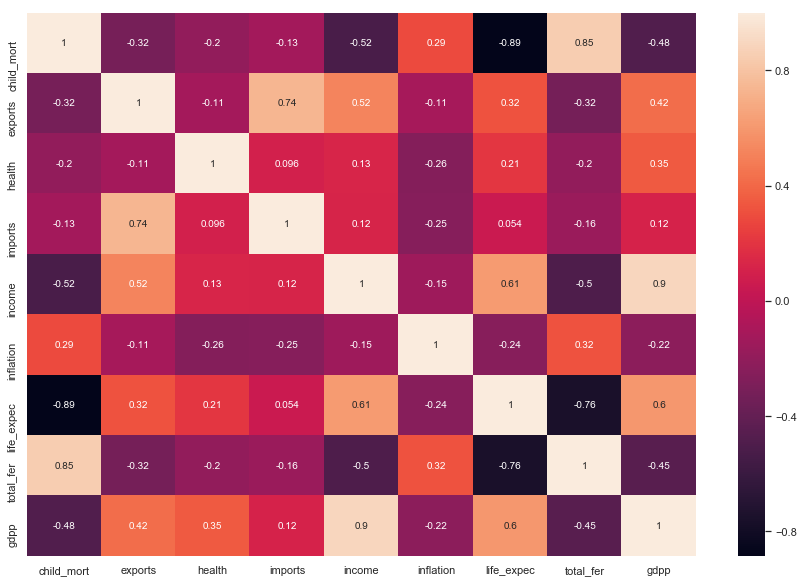

In [9]:
## Heatmap to understand the attributes dependency
plt.figure(figsize = (15,10))
sns.heatmap(country_data.corr(),annot=True)

### Inference - 

 - The column named 'child_mort' and 'total_fer' are highly correlated with correlation of -0.89
 - The column named 'child_mort' and 'life_expec' are highly correlated with correlation of 0.85
 - The column named 'imports' and 'exports' are highly corrlated with correlation of 0.74
 - The column named 'life_expec' and 'total_fer are highly correlated with correlation of -0.76

### Pairplot

- A pairplot plot a pairwise relationships in a dataset.
- The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column

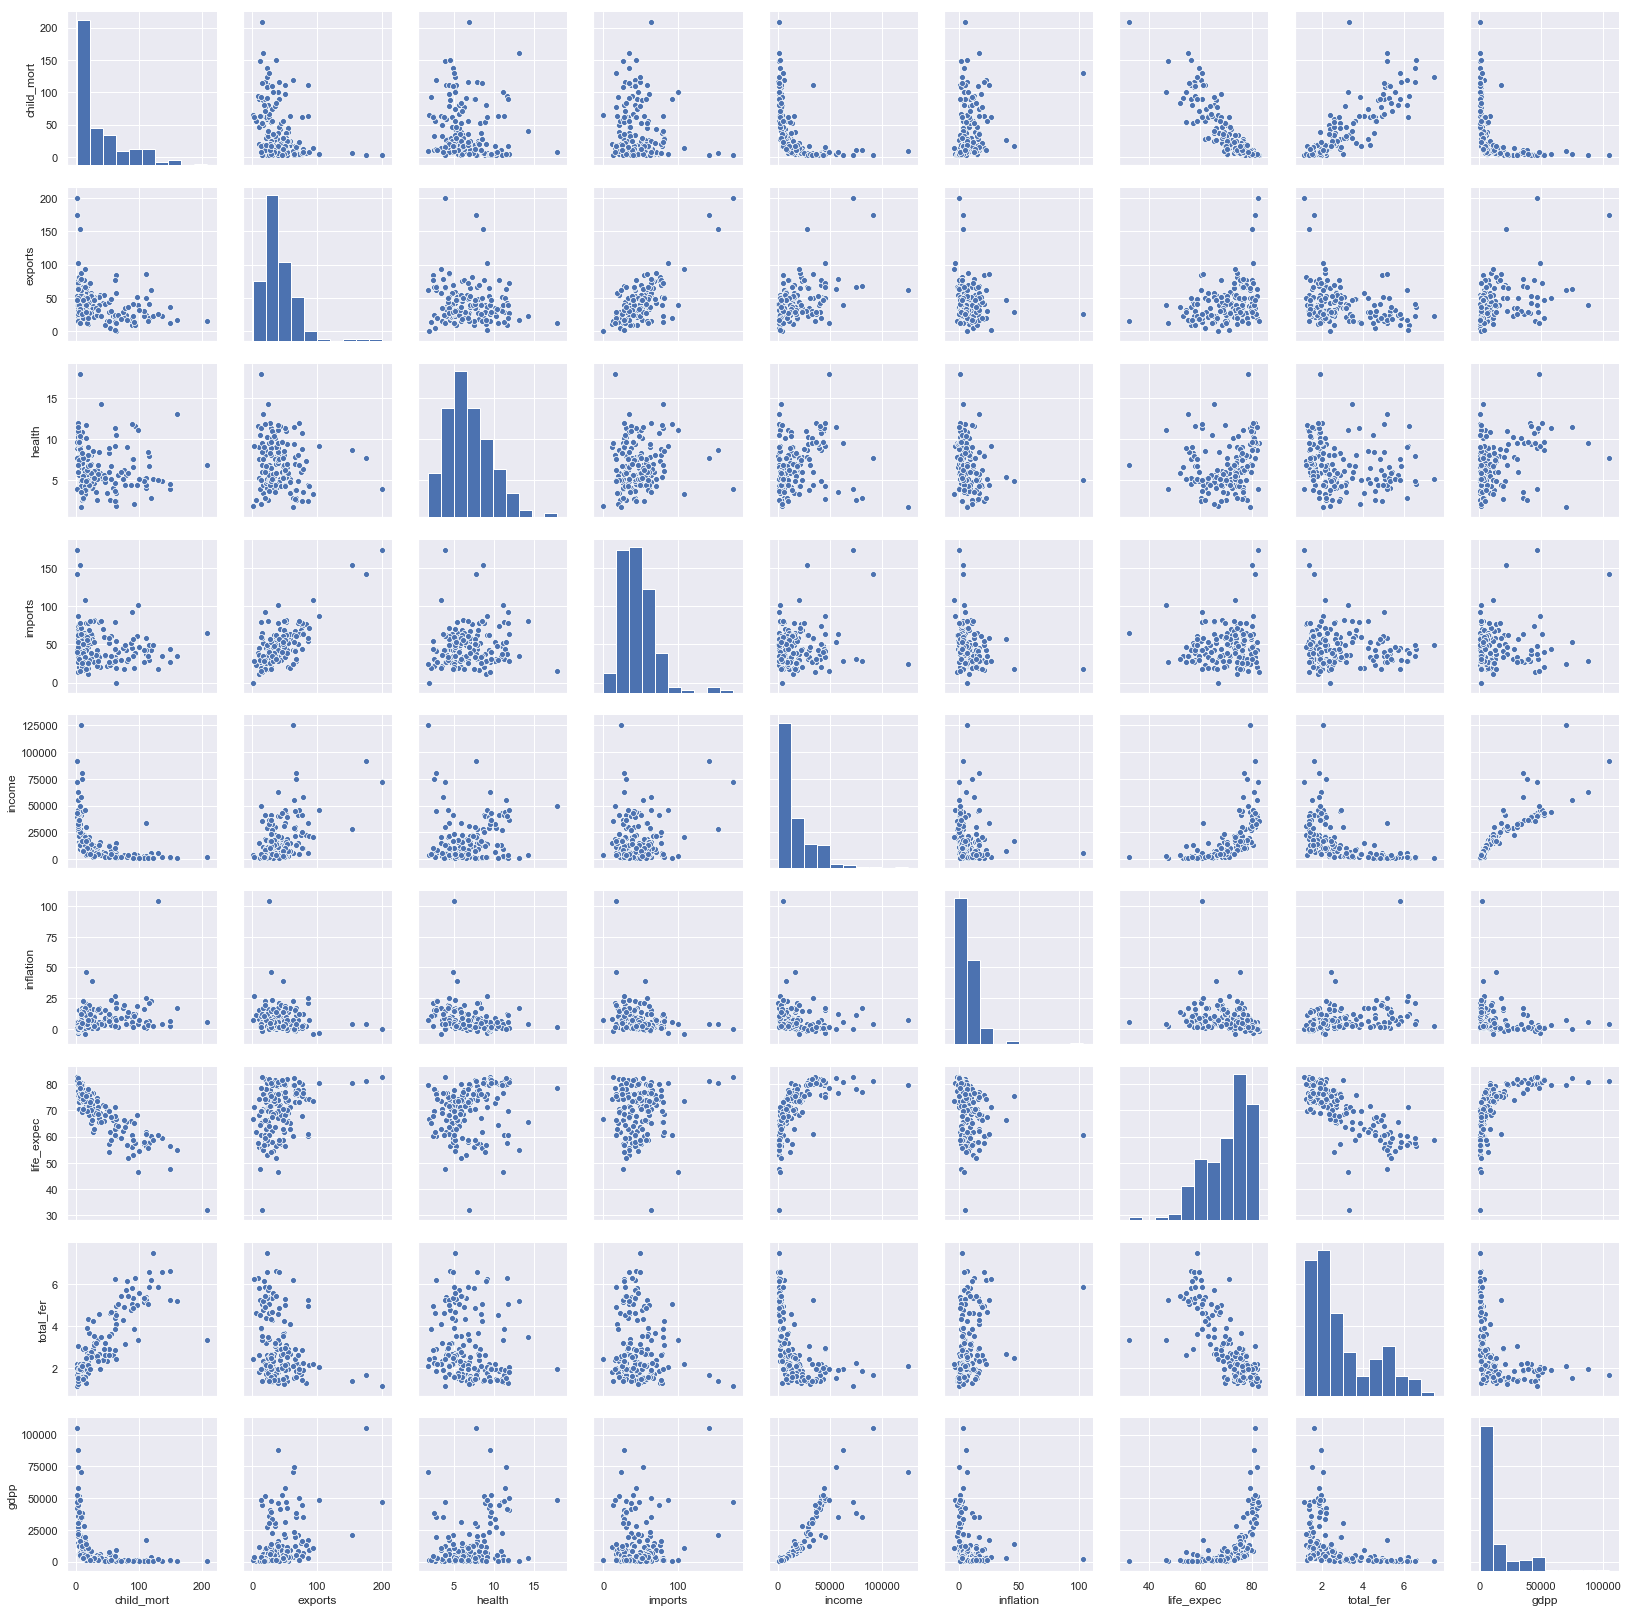

In [10]:
## Pairplot of all numeric columns
sns.pairplot(country_data)

# Data Preparation

### Derived Metrices

Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [11]:
country_data['exports'] = country_data['exports']*country_data['gdpp']/100
country_data['imports'] = country_data['imports']*country_data['gdpp']/100
country_data['health'] = country_data['health']*country_data['gdpp']/100

## Dropping Country field as final dataframe will only contain data columns
country_data_drop = country_data.copy()
country = country_data_drop.pop('country')

# Outlier Treatment

- Outlier is all about treating the descrepency in the data.
- There are 2 types of outliers and we will treat outliers as it can skew our dataset¶
    - Statistical
    - Domain specific
- Here we are executing the statistical outlier.

- As we can see there are a number of outliers in the data.

- Keeping in mind we need to identify backward countries based on socio economic and health factors.
- We will cap the outliers to values accordingly for analysis.

### Outlier Analysis and Treatment:

#### Before Treatment

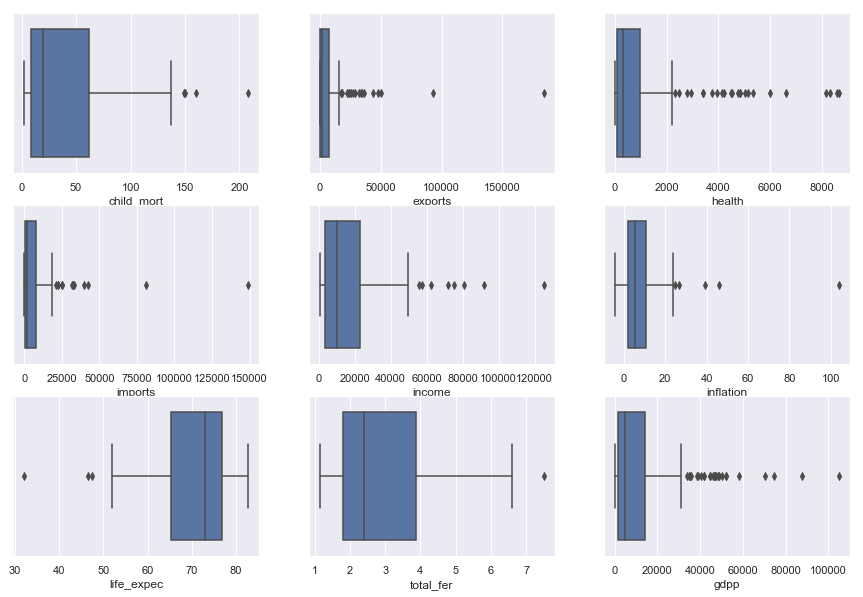

In [12]:
# Check outliers
plt.figure(figsize = (15,10))
for i in enumerate(country_data_drop.columns):
    plt.subplot(3,3,i[0]+1)
    plt.xlabel(i)
    sns.boxplot(x = i[1], data = country_data_drop)

In [13]:
def capping(data,col):
    percentile = data[col].quantile([0.05,0.95]).values
    data[col][data[col]<=percentile[0]] = percentile[0]
    data[col][data[col]>=percentile[1]] = percentile[1]
    return data 

## Capping the dataset -- child_mort
for col in country_data_drop.columns:
    country_data_drop = capping(country_data_drop,col=col)

#### After Treatment

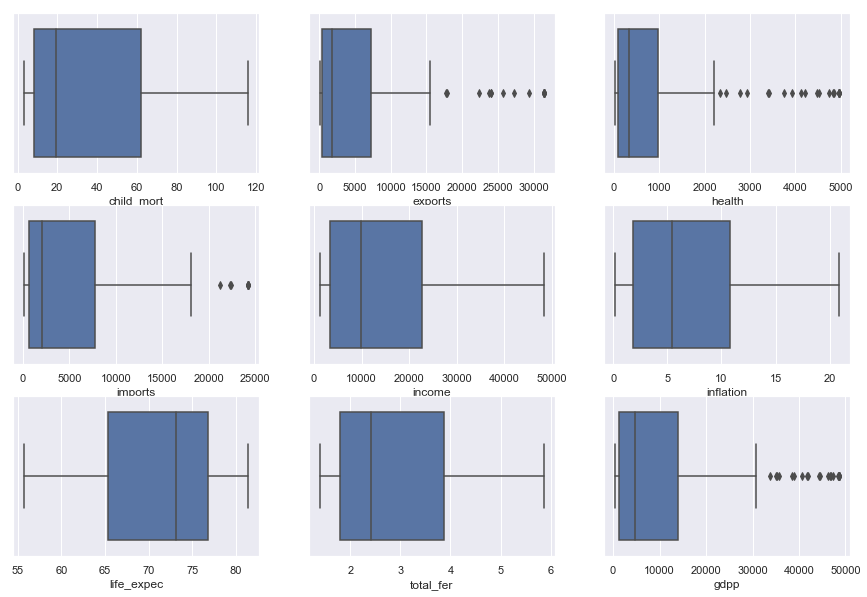

In [14]:
# Check outliers
plt.figure(figsize = (15,10))
for i in enumerate(country_data_drop.columns):
    plt.subplot(3,3,i[0]+1)
    plt.xlabel(i)
    sns.boxplot(x = i[1], data = country_data_drop)

### Rescaling the Features

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. Two common ways to rescale the given data

1. Min-Max scaling - 'Min-Max' Scaling technique re-scales a feature or observation value with distribution value between 0 and 1.
2. Standardisation (mean-0, sigma-1) - 'Standardisation' Scaling technique re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1. 

We will be using Standardisation because we want the data to be normally distributed, we will be using StandardScaler


In [15]:
scale = StandardScaler()
country_data_scaled= scale.fit_transform(country_data_drop)

# PCA Application

- Principal Component Analysis or PCA is a widely used technique for dimensionality reduction of the large data set.
- Reducing the number of components or features costs some accuracy and on the other hand, it makes the large data set simpler, easy to explore and visualize.
- It also reduces the computational complexity of the model which makes machine learning algorithms run faster
- PCA used for two reasons:
     - Dimensionality Reduction: The information distributed across a large number of columns is transformed into principal components (PC) such that the first few PCs can explain a sizeable chunk of the total information (variance). These PCs can be used as explanatory variables in Machine Learning models.
     - Visualize Classes: Visualising the separation of classes (or clusters) is hard for data with more than 3 dimensions (features). With the first two PCs itself, it’s usually possible to see a clear separation.

[0.68508868 0.14727819 0.09507098 0.03147493 0.01636993 0.0119143
 0.00890517 0.00252245 0.00137538]


Text(0,0.5,'Variance Ratio')

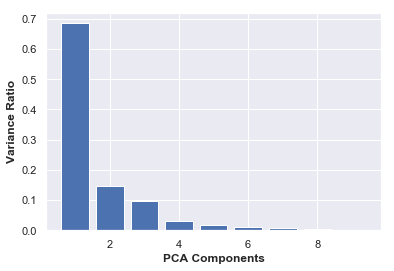

In [16]:
## Apply the PCA on the scaled data
pca = PCA(random_state=42)
pca.fit(country_data_scaled)

## Variance Ratio
print(pca.explained_variance_ratio_)

## Variance Ratio bar plot for each PCA components.
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

### Inference - 
 - The first principal component which has been created explains 68% of variance.
 - The second principal component explains 14% of variance.
 - As overall , the first and second components together explains 82% of variance.
 

### Scree Plot 

- A Scree plot is a diagnostic tool to check whether PCA works well on your data or not. 
- Principal components are created in order of the amount of variation they cover: PC1 captures the most variation, PC2 — the second most, and so on. 
- Each of them contributes some information of the data, and in a PCA, there are as many principal components as there are characteristics. Leaving out PCs and we lose information.
- If the first two or three PCs have capture most of the information, then we can ignore the rest without losing anything important.
- A scree plot shows how much variation each PC captures from the data.
- The y axis is eigenvalues, which essentially stand for the amount of variation. Use a scree plot to select the principal components to keep. An ideal curve should be steep, then bends at an “elbow” — this is your cutting-off point — and after that flattens out

Text(0,0.5,'Cumulative Explained Variance')

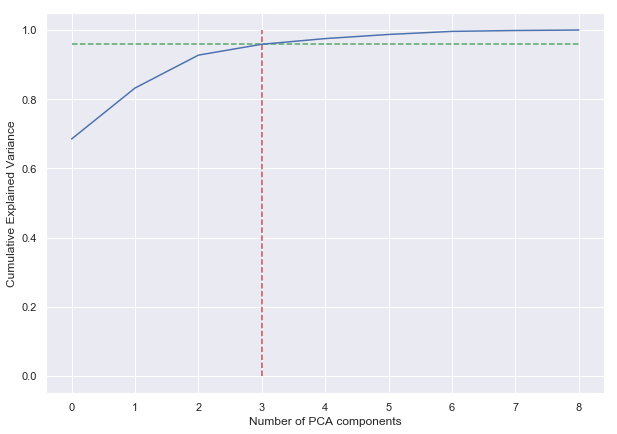

In [17]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,7))
plt.plot(var_cum)
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

### Inference - 
- From the Scree plot, we can see that the curve is increasing continuously but at some point, it starts to flatten.
- We can say that after a component of 3, we can see the curve flattening indicating many variations are not been explained by increasing the cluster size to be more than 3.
- More than 90% of variance is explained by first 3 principal component. Hence, we will use these components only going forward for clustering process.

### Plotting the above for better visualisation with PC1 and PC2

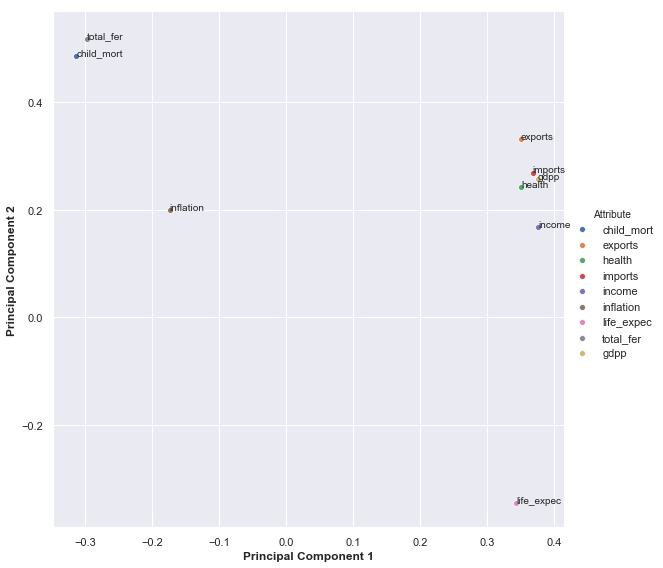

In [18]:
## Check which attributes are well explained by the pca components
org_col = list(country_data.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

## Plotting the above for better visualisation with PC1 and PC2
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

### Inference - 
 - 'life_expec','income','gdpp','health' are very well explained by PC1
 - 'imports','exports' are well explained by both the components PC1 and PC2
 - 'child_mort' and 'total_fer' are well explained by PC2.
 - 'inflation' is neither explained by PC1 nor with PC2.

### Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

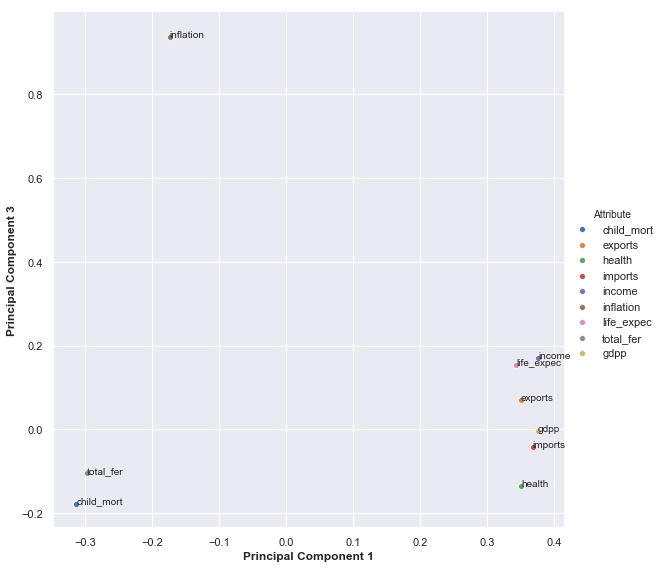

In [19]:
## Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.
sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

### Inference - 
 - As previously obtained, 'life_expec','income','gdpp','health' is explained by PC_1
 - The variable named 'exports' and 'imports' is explained by PC_1 more when compared to PC_3
 - The variable named 'inflation' is well explained by the principal component PC_3
 
#### From both the above plots, We can tell that 90% of variance has been explained by 3 principal component.

## Incremental PCA

- Incremental principal component analysis (IPCA) is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory
- IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. 
- It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

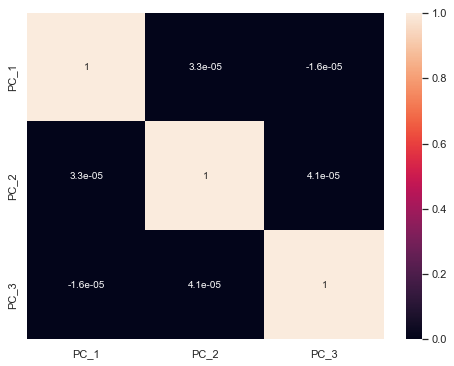

In [20]:
## Building the dataframe using Incremental PCA for better efficiency.
inc_pca = IncrementalPCA(n_components=3)

## Fitting the scaled df on incremental pca
df_inc_pca = inc_pca.fit_transform(country_data_scaled)

## Creating the new dataframe using principal components
df_pca = pd.DataFrame(df_inc_pca,columns=['PC_1','PC_2','PC_3'])
df_pca_final = pd.concat([country,df_pca],axis=1)

## Plotting Heatmap to check is there still dependency in the dataset.
plt.figure(figsize = (8,6))        
sns.heatmap(df_pca_final.corr(),annot = True)

### Inference - 

- From the above plot we can see the dependency of variables between 'PC_1','PC_2' and 'PC3'.
- As we see the correlation value among the attributes is almost 0. So we can tell that there is no correlation between the components

### Scatter Plot to visualize the spread of data across PCA components

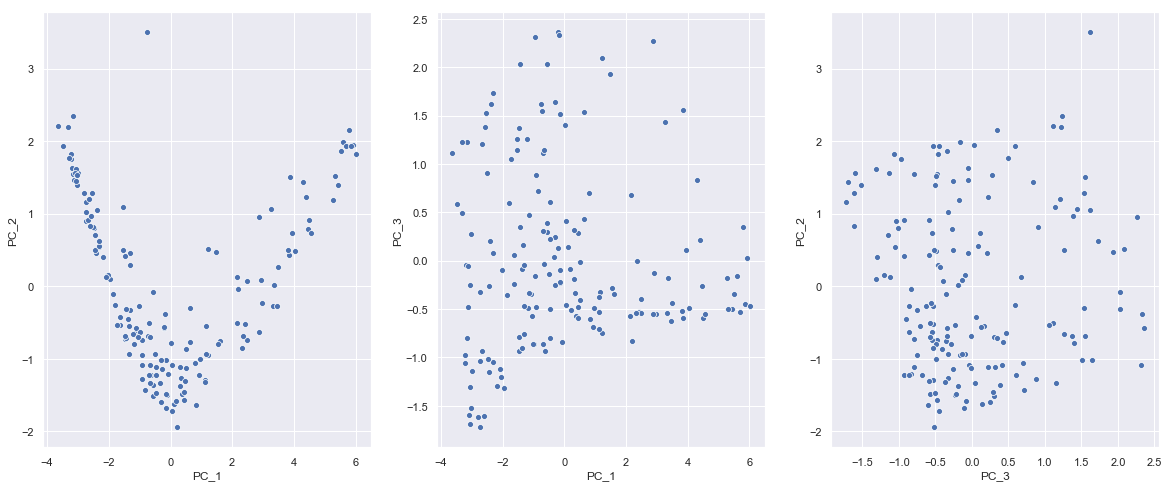

In [21]:
## Scatter Plot to visualize the spread of data across PCA components
plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')

### Inference -

- The above plots shows the variability of components with each other.
- From the above plot, we can see some pattern between PC_1 and PC_2. 
- When comparing other plots, we can say that there is no pattern which is seen between PC1 and PC3 , PC3 and PC2.

## Outlier Analysis and Treatment for PCA components

- Here we are using capping method inorder to treat the outlier
- Any value which out of range of 5th and 95th percentile can be considered as outlier.
- Those values are been replaced by 5th and 95th percentile value.
- Lower outlier is replaced by 5th percentile value, upper outliers have been replaced by 95th percentile.

### Before Treatment

Text(0.5,0,'PC Components')

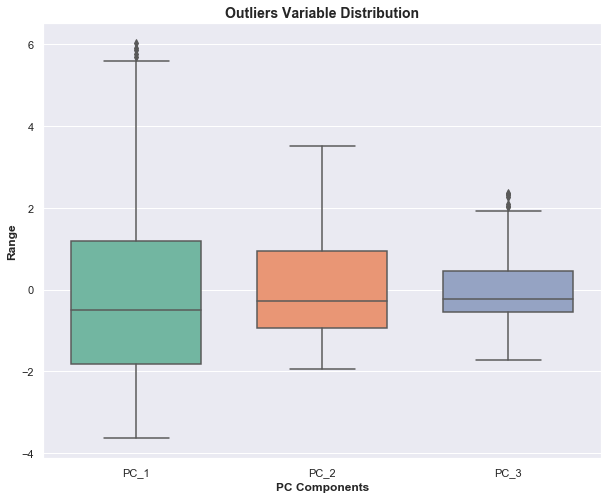

In [22]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[['PC_1','PC_2','PC_3']],orient='v',palette='Set2',width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [23]:
## Statstical Outlier treatment for PC_1
Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

## Statstical Outlier treatment for PC_2
Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

## Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

### After Treatment

Text(0.5,0,'PC Components')

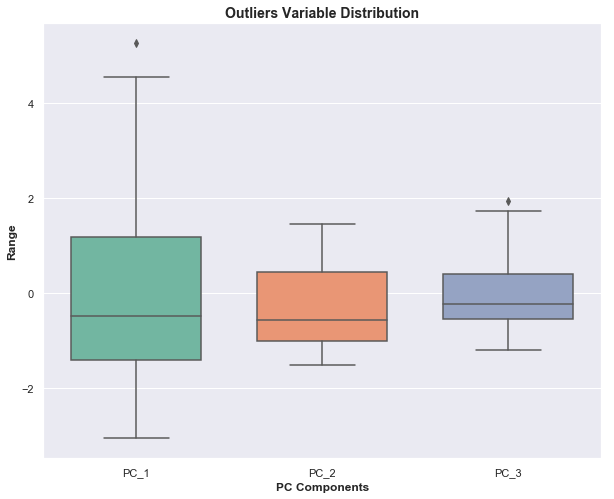

In [24]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[['PC_1','PC_2','PC_3']],orient='v',palette='Set2',width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

In [25]:
# Reindexing the df after outlier removal
df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)

# Hopkins Statistice Test

- The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.
- It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. 
- A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [26]:
## Calculating Hopkins score to know whether the data is good for clustering or not.
def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if math.isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

print('The Hopkins score for the Cluster is {:.2f}'.format(hopkins(df_pca_final_data)))

The Hopkins score for the Cluster is 0.71


### Inference - 
- The above score seems to be good score inorder to perform the cluster for this data

## Modelling

### K- Means Clustering

- A cluster refers to a collection of data points aggregated together because of certain similarities.
- The K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.
- To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids
- It halts creating and optimizing clusters when either:
   - The centroids have stabilized — there is no change in their values because the clustering has been successful.
   - The defined number of iterations has been achieved.


### Finding the Optimal Number of Clusters

#### Elbow Curve Method -

- The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 10 in the examples above), and for each value of k calculate the sum of squared errors (SSE)
- Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

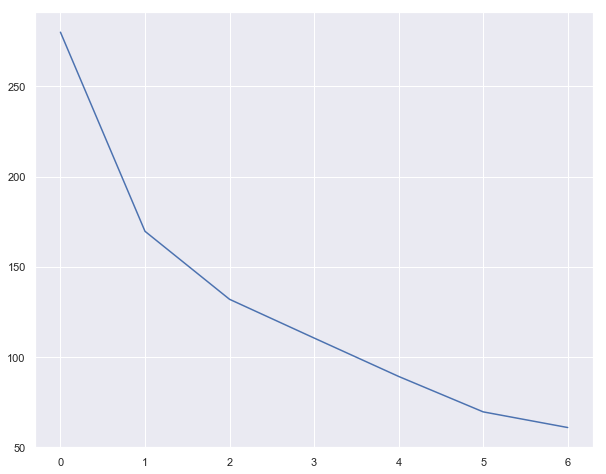

In [27]:
from sklearn.cluster import KMeans
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pca_final_data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Inference - 
- The Plot defines the curve which defines the way for us to decide of number of clusters.
- From the plot we can tell that 4 or 5 would be better options to consider as the curve starts to flatten from that point

#### Silhouette analysis

- The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually
- Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters.
- A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
     silhouette score=p−q/max(p,q)
  where p is the mean distance to the points in the nearest cluster that the data point is not a part of
        q is the mean intra-cluster distance to all the points in its own cluster.

- The value of the silhouette score range lies between -1 to 1.
- A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
- A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [28]:
## Silhouette score analysis to find the ideal number of clusters for K-means clustering
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5080660995283218
For n_clusters=3, the silhouette score is 0.420779166754405
For n_clusters=4, the silhouette score is 0.37673332852390884
For n_clusters=5, the silhouette score is 0.35699558442831547
For n_clusters=6, the silhouette score is 0.3557765988814858
For n_clusters=7, the silhouette score is 0.39590429437966224
For n_clusters=8, the silhouette score is 0.372529073738928


In [29]:
## K-means with k=4 clusters
cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(df_pca_final_data)

## Assign the label
df_pca_final['Cluster_Id4'] = cluster4.labels_

## Number of countries in each cluster
print('Number of Clusters with countries')
df_pca_final['Cluster_Id4'].value_counts()

Number of Clusters with countries


3    52
1    26
0    24
2    17
Name: Cluster_Id4, dtype: int64

### Inference - 
- From the above Silhoutte score, we can tell that number '4' of cluster value has 37% when compared to >5 which has no much variance in the score later.
- It seems there are good number of countries in each clusters.

### Scatter plot on Principal components to visualize the spread of the data

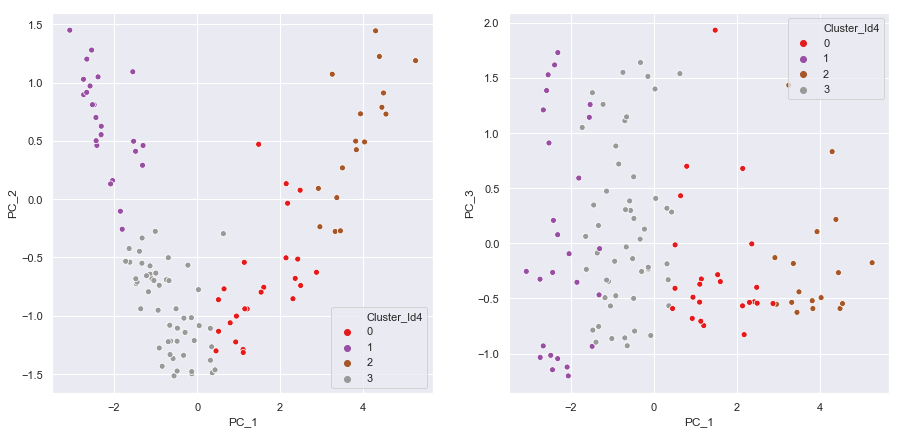

In [30]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[1])

### Inference - 
- From the figure, we can see intra-distance between the cluster elements, which is not a good sign.

In [31]:
## Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.
df_pca_final = df_pca_final.drop('Cluster_Id4',axis=1)

## K-means with k=5 clusters
cluster5 = KMeans(n_clusters=5, max_iter=50,random_state=100)
cluster5.fit(df_pca_final_data)

## assign the label
df_pca_final['Cluster_Id'] = cluster5.labels_

In [32]:
## Number of countries in each cluster
print('Number of countries in each cluster')
df_pca_final['Cluster_Id'].value_counts()

Number of countries in each cluster


0    50
4    20
3    20
1    16
2    13
Name: Cluster_Id, dtype: int64

### Inference:
- It seems there are good number of countries in each clusters.

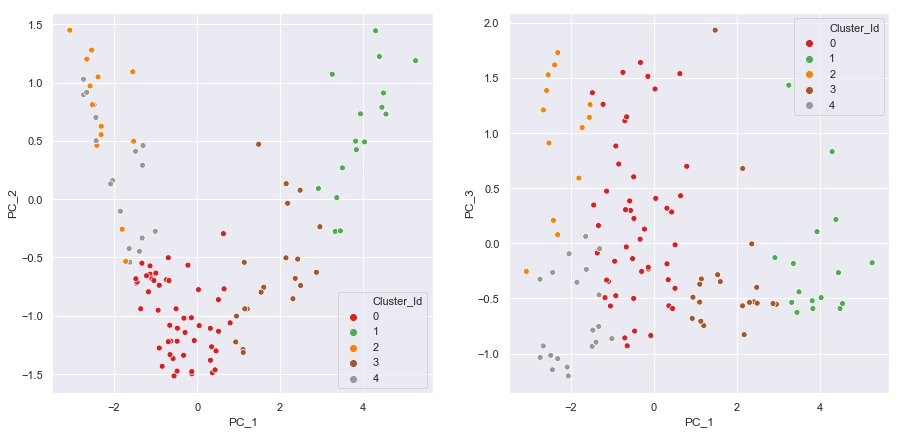

In [33]:
## Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,2, figsize=(15,7))
sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_pca_final,ax=axes[1])

### Inference -
- Here also we got the same issue as with 4 clusters but we got a new segment, so lets proceed with K means using 5 clusters.


We have visualized the data on the principal components and saw some good clusters were formed but some were not so good hence let's now visualize the data on the original attributes.

In [34]:
## Merging the df with PCA with original df
df_merge = pd.merge(country_data,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

## Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())
df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,22.4000,2089.7678,2250.6593,335.1752,10751.2000,7.2630,73.0140,2.3714,5279.7600
1,1,5.2062,21636.6187,18278.5250,3680.4419,47650.0000,2.5358,80.7375,1.7581,42400.0000
2,2,66.1462,872.6160,681.6086,117.5110,4670.0000,16.9077,65.1923,4.5654,2179.7692
3,3,7.1400,9374.4700,9371.0950,1442.0290,26050.0000,1.6395,76.9150,1.7400,18835.0000
4,4,69.6700,796.6945,1006.4954,146.3257,4068.0000,5.4345,60.4600,3.7580,2038.9500


From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. We have also cross checked with Principal components and found that these variables have good score in PCA. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

### Scatter plot on Original attributes to visualize the spread of the data

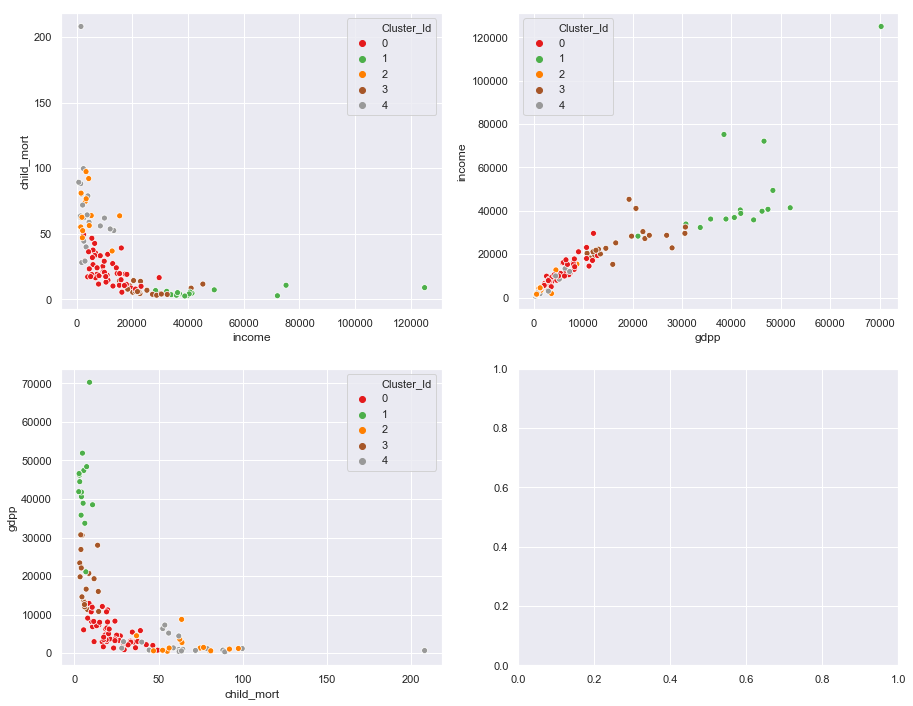

In [35]:
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="Set1",ax=axes[1][0])

### Box plot on Original attributes to visualize the spread of the data

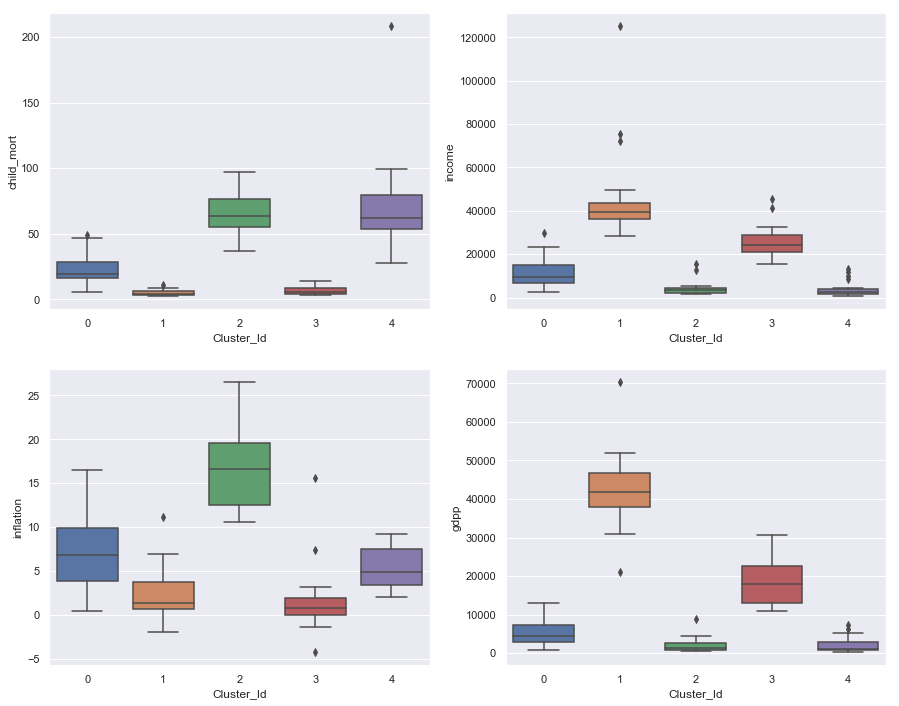

In [36]:
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])

### Inference:
- Child Mortality is highest for Cluster 0 and Cluster 3.These clusters need some aid.
- Income and Gdpp are measures of development. Higher the per capita income and gdpp better is the country's development. - - Income per capita and gdpp seems lowest for countries in clusters 0 and 3. Hence, these countries need some help

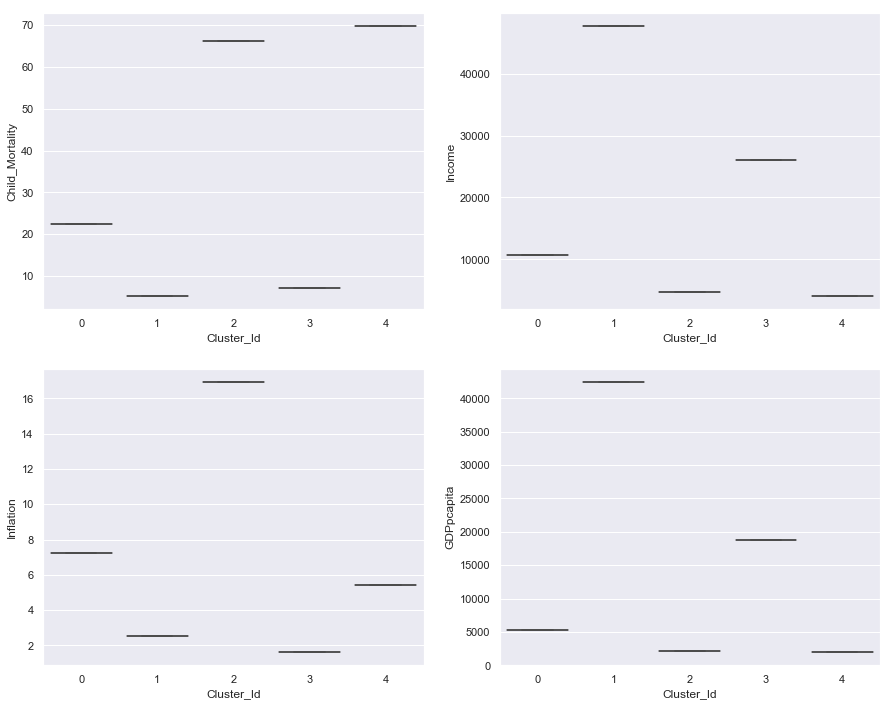

In [37]:
## Box plot to visualise the mean value of few original attributes.
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.boxplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.boxplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.boxplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.boxplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])

### Inference:
- The mean values suggests the same story as above

# Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

- Divisive
- Agglomerative

##### Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

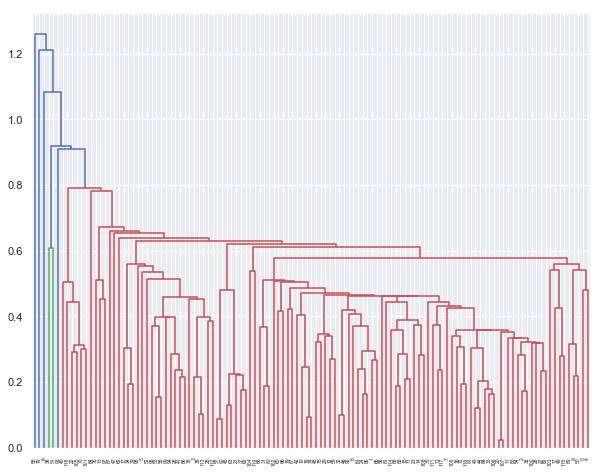

In [38]:
mergings = linkage(df_pca_final_data, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

##### Below Plot shows the Complete Linkage Plot

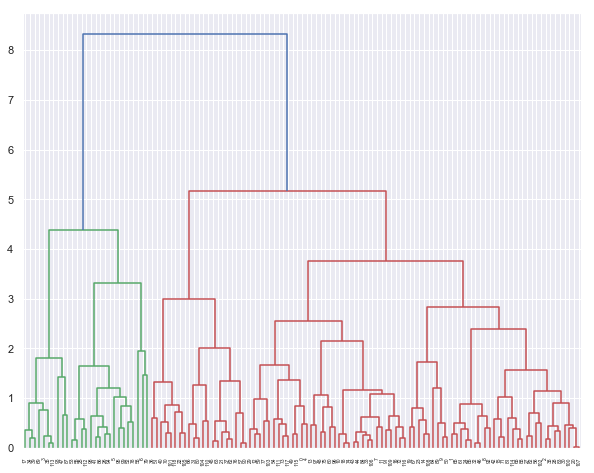

In [39]:
## Complete Linkage
mergings = linkage(df_pca_final_data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [40]:
df_pca_hc = df_pca_final.copy()
df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)

## Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']

### Scatter plot on Principal components to visualize the spread of the data

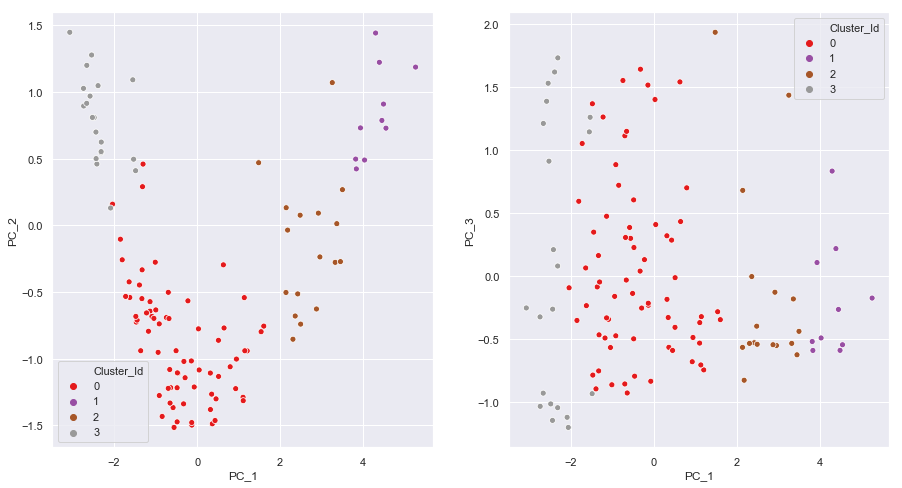

In [41]:
fig, axes = plt.subplots(1,2, figsize=(15,8))
sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])

### Inference:¶
Cluster 4 seems to be not properly formed in Plot 1.

# Cluster Profiling

In [42]:
## Merging the df with PCA with original df
df_merge_hc = pd.merge(country_data,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]
# df_merge_col_hc.head()

### Scatter plot on Original attributes to visualize the spread of the data

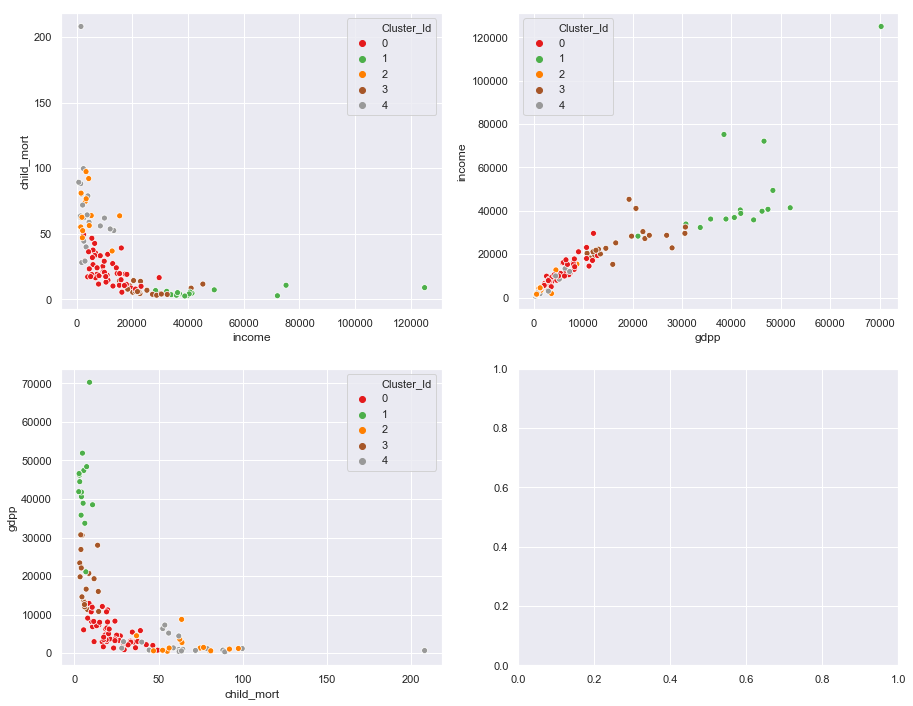

In [43]:
## Scatter plot on Original attributes to visualize the spread of the data
fig, axes = plt.subplots(2,2, figsize=(15,12))
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][0])
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1",ax=axes[0][1])
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1",ax=axes[1][0])

<b>We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.</b>

# Final Analysis

We got Cluster 0 and Cluster 3 which are in need of aid.



In [44]:
df_clus0 = df_merge_col[df_merge_col['Cluster_Id'] ==0]
df_clus3 = df_merge_col[df_merge_col['Cluster_Id'] ==3]

## List of countries which need help
df_append= df_clus0.append(df_clus3)
print('Describing the distribution of the data')
df_append.describe()

Describing the distribution of the data


,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000
mean,18.0400,4171.1113,4285.0695,651.4191,15122.2857,5.6563,74.1286,2.1910,9152.6857,0.8571
std,11.2931,4014.6657,3720.7595,681.9194,9345.2585,5.1053,3.6662,0.6727,7561.8405,1.3650
min,3.2000,121.2800,165.2440,26.6816,2440.0000,-4.2100,65.3000,1.2300,758.0000,0.0000
25%,9.0250,1047.5925,1414.9950,191.4963,7312.5000,1.4950,71.4250,1.5750,3250.0000,0.0000
50%,17.3000,2354.3400,2633.8500,386.8845,13600.0000,4.6750,74.1000,2.1450,6685.0000,0.0000
75%,24.1000,6037.3000,6409.4150,890.4450,20925.0000,8.5200,76.4750,2.6150,12175.0000,3.0000
max,49.4000,15046.2000,14718.6000,2928.7800,45300.0000,16.5000,81.9000,4.3400,30700.0000,3.0000


We have removed few countries during outlier treatment but we might have dropped some countries which might be in need of help. Let's iterate our final list based on the information from the clusters which were in need of aid.ie, Cluster 3 and Cluster 4

#### Based on final clusters information we are going to deduce the final list. We observed that mean child mortality is 53 for the selected clusters and hence let's take all the countries with more than this child mortality 

In [45]:
df_final_list = country_data[country_data['child_mort']>53]
## Let's check the demographic of the resultant data again
df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000,48.0000
mean,93.0208,848.1537,97.5164,754.1698,3695.0625,11.6195,59.5500,4.9121,1797.5000
std,32.4204,2266.2194,149.2196,1509.6237,5325.9968,15.4064,6.5526,1.1486,2852.8295
min,53.7000,1.0769,12.8212,0.6511,609.0000,0.8850,32.1000,2.4100,231.0000
25%,63.8500,101.6303,31.9700,188.8055,1390.0000,3.7925,56.7250,4.3450,551.5000
50%,89.7500,188.2900,48.7265,313.8570,1900.0000,8.2150,60.2500,5.0550,932.0000
75%,111.0000,417.9150,72.7850,571.8375,3785.0000,16.2250,63.8500,5.5975,1377.5000
max,208.0000,14671.8000,766.0800,10071.9000,33700.0000,104.0000,71.1000,7.4900,17100.0000


#### We observed that mean income is 3695 for the selected clusters and hence . let's take all the countries with less than this income .

In [46]:
df_final_list1 = df_final_list[df_final_list['income']<=3695]

## Let's check the demographic of the resultant data again
df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000,35.0000
mean,98.7200,190.7614,56.9363,352.9760,1735.8000,8.4913,58.3771,5.2526,831.2000
std,32.8870,159.7151,56.7278,280.1672,769.1895,6.6906,6.9571,0.8977,606.5572
min,55.2000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,3.3000,231.0000
25%,75.7000,80.3515,31.5122,170.5340,1215.0000,2.7900,56.2500,4.8100,470.5000
50%,90.5000,131.9850,41.9174,254.5600,1540.0000,6.3900,58.7000,5.2100,648.0000
75%,112.5000,224.5845,57.8575,400.2865,2135.0000,12.2000,62.0000,5.7650,1085.0000
max,208.0000,617.3200,328.3200,1190.5100,3370.0000,26.5000,71.1000,7.4900,3600.0000


#### We observed that mean gdpp is 831 for the selected clusters and hence, let's take all the countries with less than this gdpp .

In [47]:
df_final_list2 = df_final_list1[df_final_list1['gdpp']<=831]

## Let's check the demographic of the resultant data again
df_final_list2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000,23.0000
mean,104.3609,105.4037,34.3630,214.7693,1296.6522,7.7520,57.3609,5.4148,521.2174
std,34.9748,49.7106,12.4766,85.1925,392.0044,5.4247,6.8716,0.8583,146.2585
min,55.2000,20.6052,12.8212,90.5520,609.0000,0.8850,32.1000,3.3300,231.0000
25%,84.6000,67.2960,26.6077,167.2820,974.0000,3.4200,55.9000,4.9450,416.0000
50%,93.6000,103.2500,34.6819,192.5440,1390.0000,6.8100,58.0000,5.3400,547.0000
75%,116.0000,132.8705,42.0538,264.0660,1520.0000,11.1000,60.8000,5.8450,621.5000
max,208.0000,196.3440,59.1150,428.3140,2090.0000,20.8000,65.9000,7.4900,769.0000


#### List of Countries which we need to pay heed to it:

In [48]:
df_final_list2['country']

0      Afghanistan             
17     Benin                   
25     Burkina Faso            
26     Burundi                 
31     Central African Republic
36     Comoros                 
37     Congo, Dem. Rep.        
50     Eritrea                 
56     Gambia                  
63     Guinea                  
64     Guinea-Bissau           
66     Haiti                   
88     Liberia                 
93     Madagascar              
94     Malawi                  
97     Mali                    
106    Mozambique              
112    Niger                   
126    Rwanda                  
132    Sierra Leone            
147    Tanzania                
150    Togo                    
155    Uganda                  
Name: country, dtype: object

### Bar Plot for Child Mortality of countries which are in need of aid


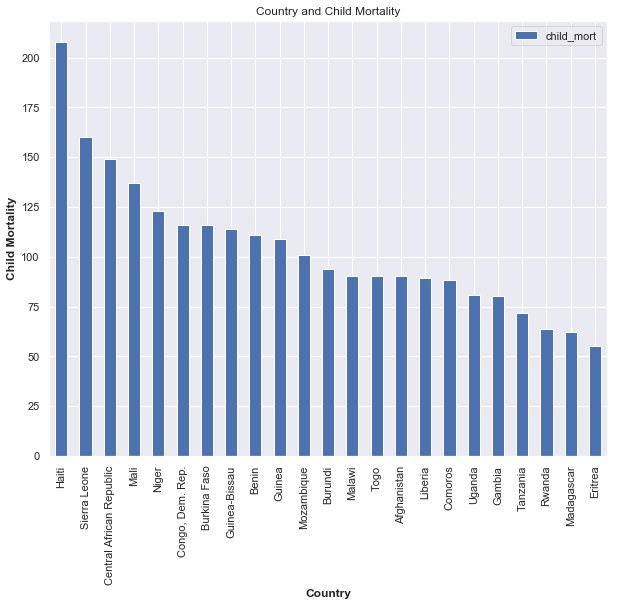

In [49]:
df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

### Inference - 
- Child mortality, refers to the mortality of children.
- When we see the child mortabilty variable, we can say that top 3 countries which have high child mortality are 'Haiti','Sierra Leone' and 'Central African Republic'.
- So, we need to pay heed to these cities as they have high rate of death of children

### Bar Plot for Per Capita Income of countries which are in need of aid

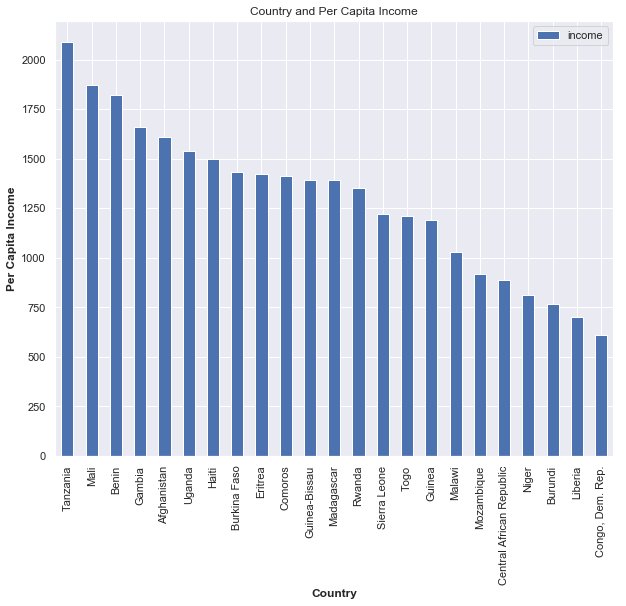

In [50]:
## BarPlot for Per Capita Income of countries which are in need of aid
df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = False))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

### Inference - 
- Per capita income or average income measures the average income earned per person in a given area in a specified year. 
- When we see the Per capita income, we can say that bottom 3 countries which have to concentrate are 'Tanzania','Malii' and 'Benin'.
- So, we need to pay heed to these cities as they have low values for per capita income.

### BarPlot for GDP Per Capita Income of countries which are in need of aid


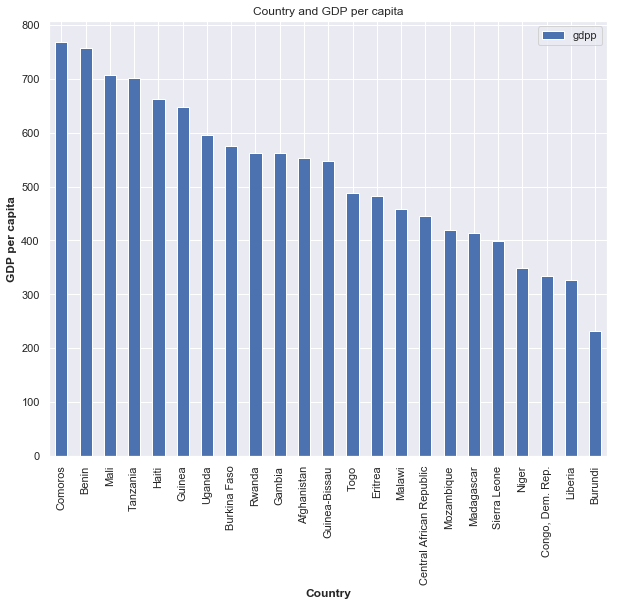

In [51]:
df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = False))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

### Inference - 
- GDP per capita describes how much citizens benefit from their country's economy.
- When we see the GDP Per capita income, we can say that bottom 3 countries which have to concentrate are 'Burundi','Liberia' and 'Congo,Dem,Rep'.
- So, we need to pay heed to these cities as they have low values for GDP per capita income.

# Closing Statement
We have used PCA above to reduce the variables involved and then done the clustering of countries based on those Principal components and then later we identified few factors like child mortality, income etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that. Based on those clusters we have identified the below list of countries which are in dire need of aid. The list of countries are subject to change as it is based on the few factors like Number of components chosen, Number of Clusters chosen, Clustering method used etc.which we have used to build the model.

#### Final List of Cities we need to concentrate on are:

In [52]:
# Final countries list
df_final_list2.reset_index(drop=True).country

0     Afghanistan             
1     Benin                   
2     Burkina Faso            
3     Burundi                 
4     Central African Republic
5     Comoros                 
6     Congo, Dem. Rep.        
7     Eritrea                 
8     Gambia                  
9     Guinea                  
10    Guinea-Bissau           
11    Haiti                   
12    Liberia                 
13    Madagascar              
14    Malawi                  
15    Mali                    
16    Mozambique              
17    Niger                   
18    Rwanda                  
19    Sierra Leone            
20    Tanzania                
21    Togo                    
22    Uganda                  
Name: country, dtype: object

In [53]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')